# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0.1 Loading data

In [2]:
df = pd.read_csv('../data/df_ready.csv')

# 1.0 Data Description

In [3]:
df1 = df.copy()

## 1.1 Data Dimension

In [4]:
print(f'Number of Rows {df1.shape[0]}')
print(f'Number of Columns {df1.shape[1]}')

Number of Rows 23151
Number of Columns 32


## 1.2 Data Columns

In [5]:
# Criando a lista de colunas a Dropar
cols_drop = ['Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'currency', 'imageURLs', 
             'shipping', 'sourceURLs', 'weight', 'Date_imp_d.1', 'Zscore_1', 'price_std']

df1 = df1.drop(columns=cols_drop)

# Criando a lista com as colunas que sobraram em snake_case
cols_name  = ['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant', 'disc_percentage', 'imp_count', 
              'Imp_count', 'brand', 'p_description', 'date_added', 'date_seen', 'date_updated', 'manufacturer', 'day_n', 
              'month', 'month_n', 'day', 'week_number']

df1.columns = cols_name

print(f'O número de colunas foi para: {df1.shape[1]}')

O número de colunas foi para: 20


In [6]:
df1.columns

Index(['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant',
       'disc_percentage', 'imp_count', 'Imp_count', 'brand', 'p_description',
       'date_added', 'date_seen', 'date_updated', 'manufacturer', 'day_n',
       'month', 'month_n', 'day', 'week_number'],
      dtype='object')

## 1.3 Data Types

In [7]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
imp_count           object
Imp_count            int64
brand               object
p_description       object
date_added          object
date_seen           object
date_updated        object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.4 Change Types

In [8]:
df1['date_imp'] = pd.to_datetime( df1['date_imp'] )

## 1.5 Check NA

In [9]:
df1.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
imp_count              0
Imp_count              0
brand                  0
p_description          0
date_added             0
date_seen              0
date_updated           0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.6 Descriptive Statistics

In [10]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64'] )

In [11]:
# Central Tendency - mean, median

ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
1,disc_price,1.0,10879.95,10878.95,494.104295,199.00,808.571509,4.748349,39.612839
2,disc_percentage,0.0,0.80,0.80,0.016933,0.00,0.077847,5.217632,28.754920
3,Imp_count,1.0,31.00,30.00,6.560926,5.00,5.403049,1.286351,1.639569
4,month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
5,day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
6,week_number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


# 2.0 Exploratory Data Analysis

In [12]:
df2 = df1.copy()

- Qual Merchant mais vendeu?
- Qual a categoria mais vendida?
- Qual a marca mais vendida?
- Quais os dias que mais vendem?
- Quais o meses que mais vendem?
- Quais semanas mais vendem?

## 2.1 Qual Merchant mais vendeu?

In [13]:
df_bb = df2.loc[ (df2['merchant'] == 'Bestbuy.com') , :]
df_bhp = df2.loc[ (df2['merchant'] == 'bhphotovideo.com') , :]
df_walmart = df2.loc[ (df2['merchant'] == 'Walmart.com') , :]
df_ebay = df2.loc[ (df2['merchant'] == 'ebay.com') , :]

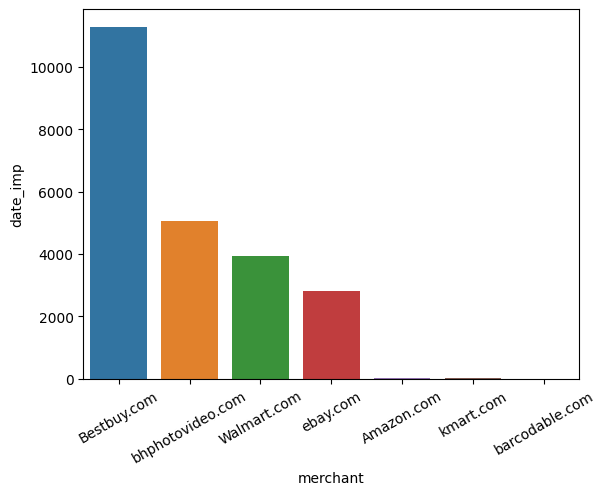

In [14]:
aux1 = df2[['date_imp', 'merchant']].groupby('merchant').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=30)
sns.barplot( data=aux1, x='merchant', y='date_imp' );

## 2.2 Qual a categoria mais vendida?

### 2.2.1 Categoria mais vendida no geral

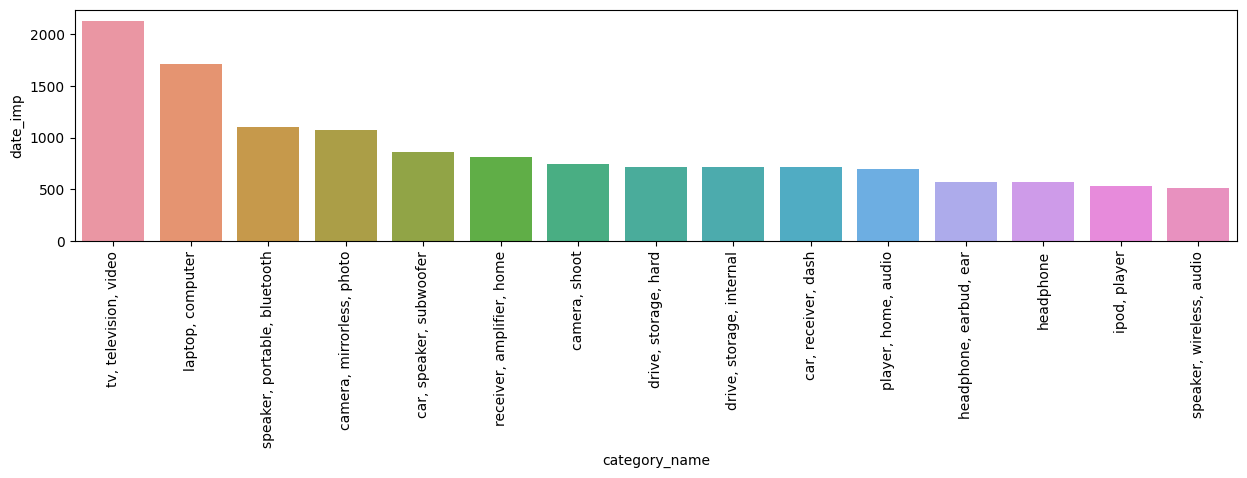

In [15]:
plt.figure(figsize=(15,3))
aux1 = df2[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
sns.barplot( data=aux1.head(15), x='category_name', y='date_imp' );

### 2.2.2. Categoria mais vendida por loja

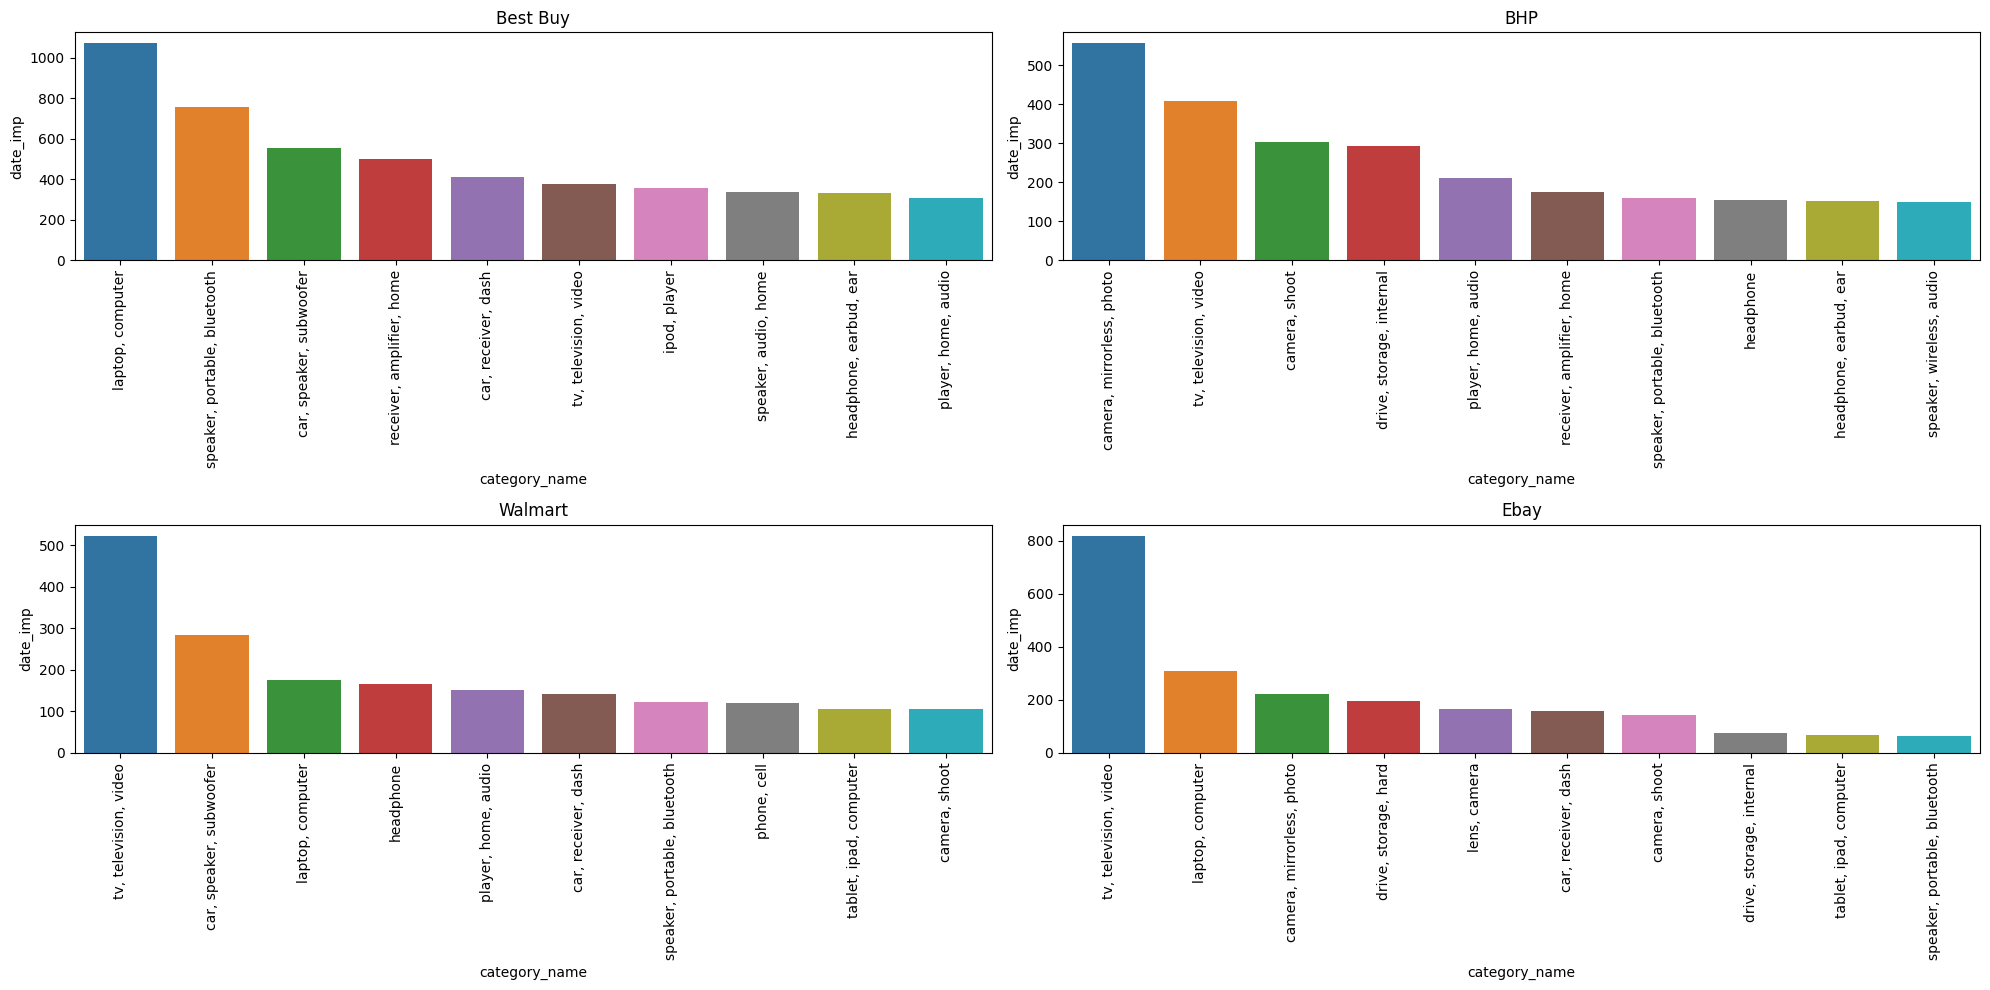

In [16]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1.head(10), x='category_name', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2.head(10), x='category_name', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3.head(10), x='category_name', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4.head(10), x='category_name', y='date_imp' );

plt.tight_layout()

## 2.3 Qual é a marca mais vendida?

### 2.3.1 No Geral

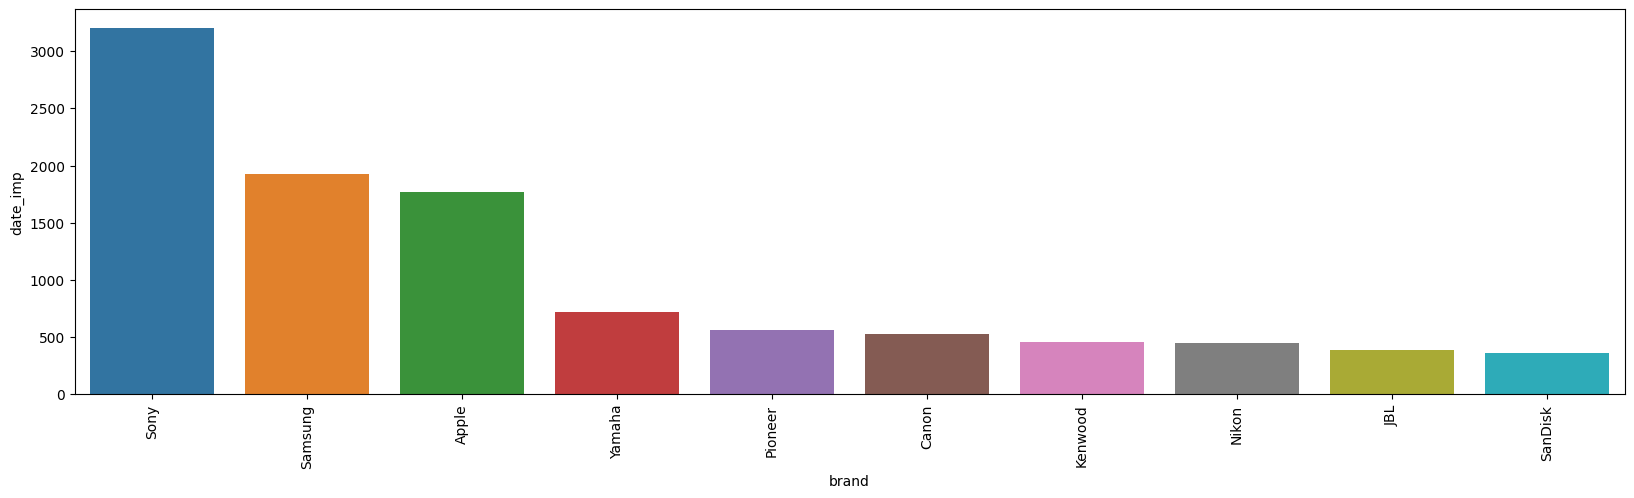

In [17]:
plt.figure(figsize=(20,5))
aux1 = df2[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=10)
sns.barplot( data=aux1.head(10), x='brand', y='date_imp' );

### 2.3.2 Por loja

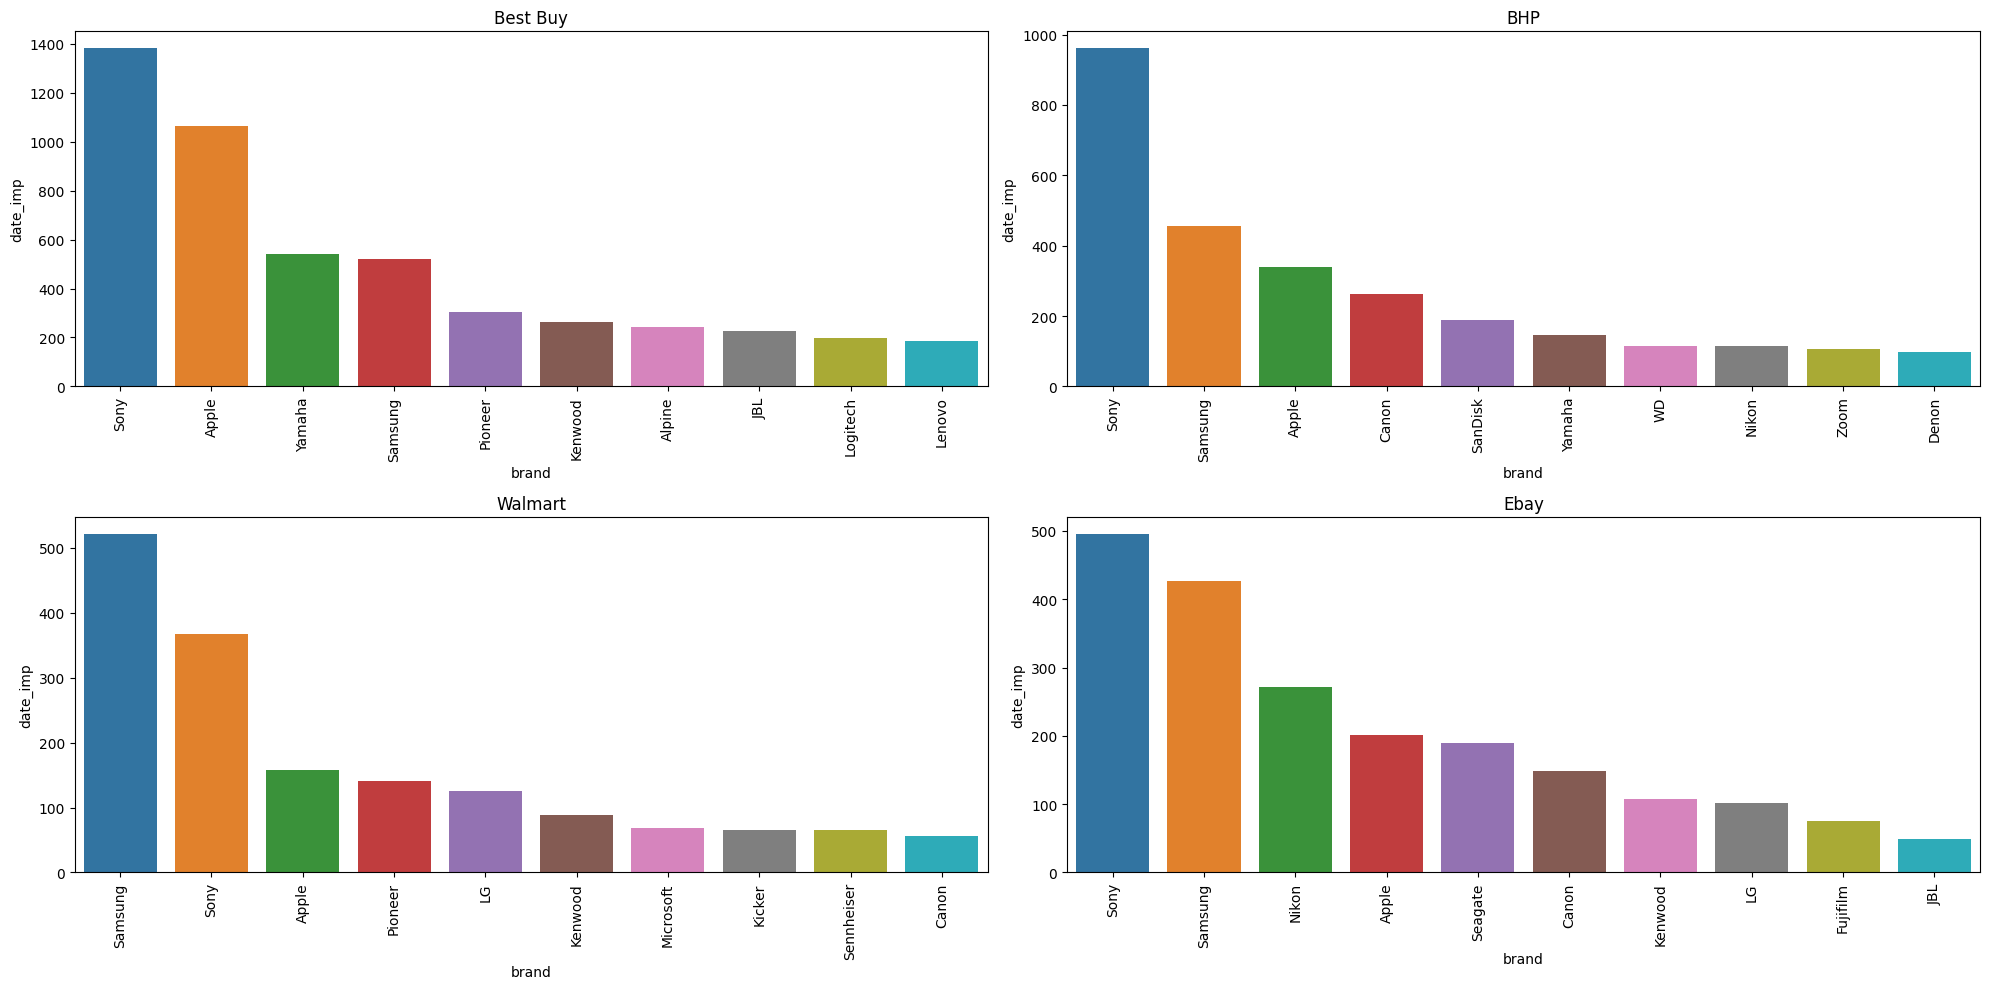

In [18]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1.head(10), x='brand', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2.head(10), x='brand', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3.head(10), x='brand', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4.head(10), x='brand', y='date_imp' );

plt.tight_layout()

## 2.4 Quais os dias que mais vendem?

### 2.4.1 No Geral

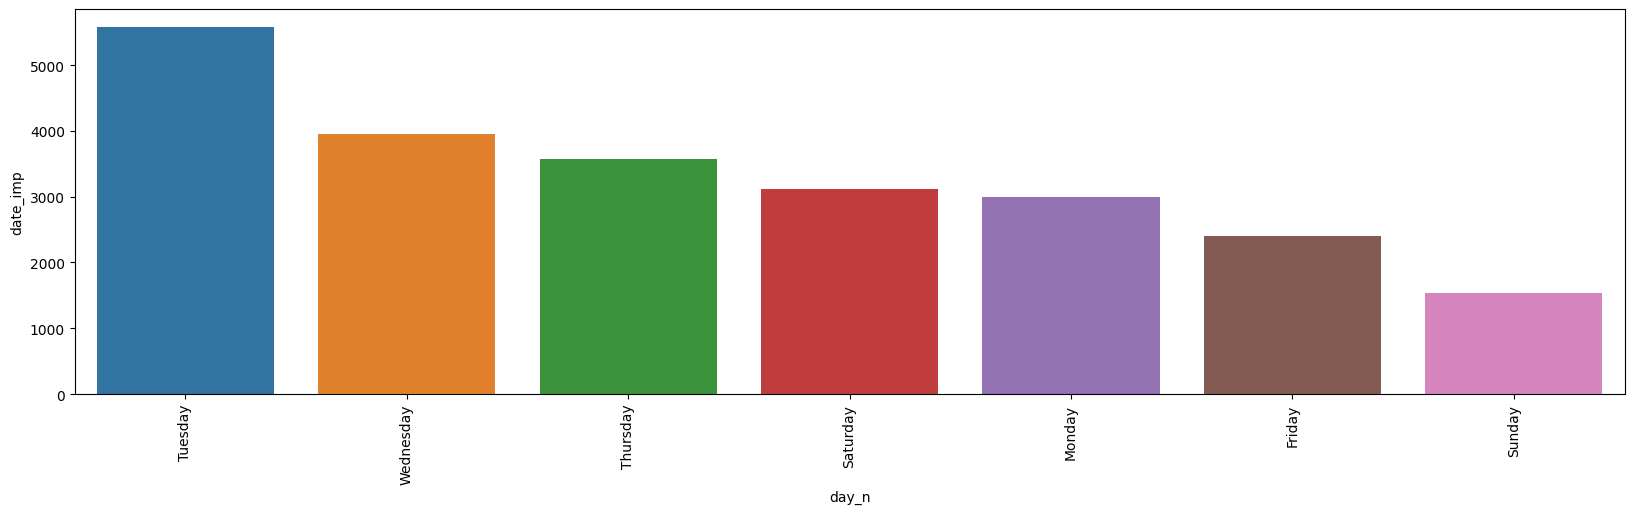

In [19]:
plt.figure(figsize=(20,5))
aux1 = df2[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=10)
sns.barplot( data=aux1, x='day_n', y='date_imp' );

### 2.4.2 Por Loja

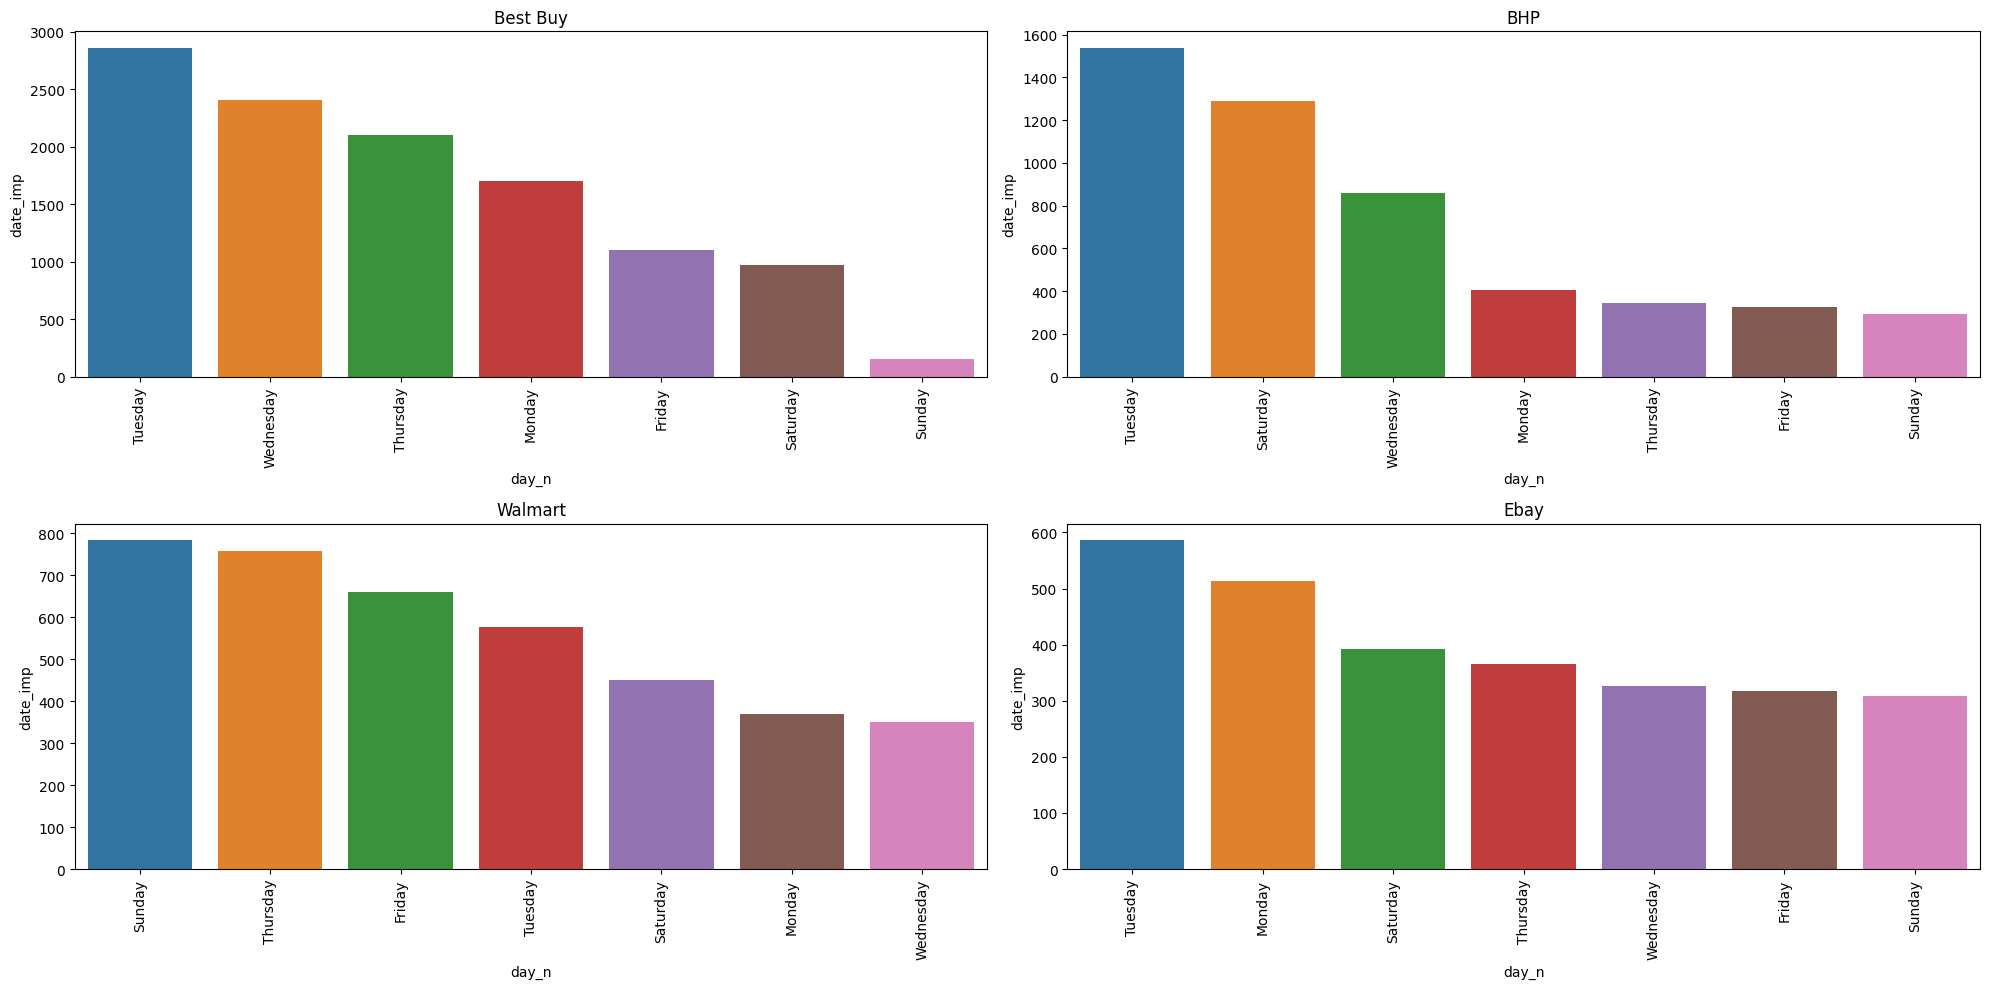

In [20]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1.head(10), x='day_n', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2.head(10), x='day_n', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3.head(10), x='day_n', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4.head(10), x='day_n', y='date_imp' );

plt.tight_layout()

## 2.5 Quais meses mais vendem?

### 2.5.1 No Geral

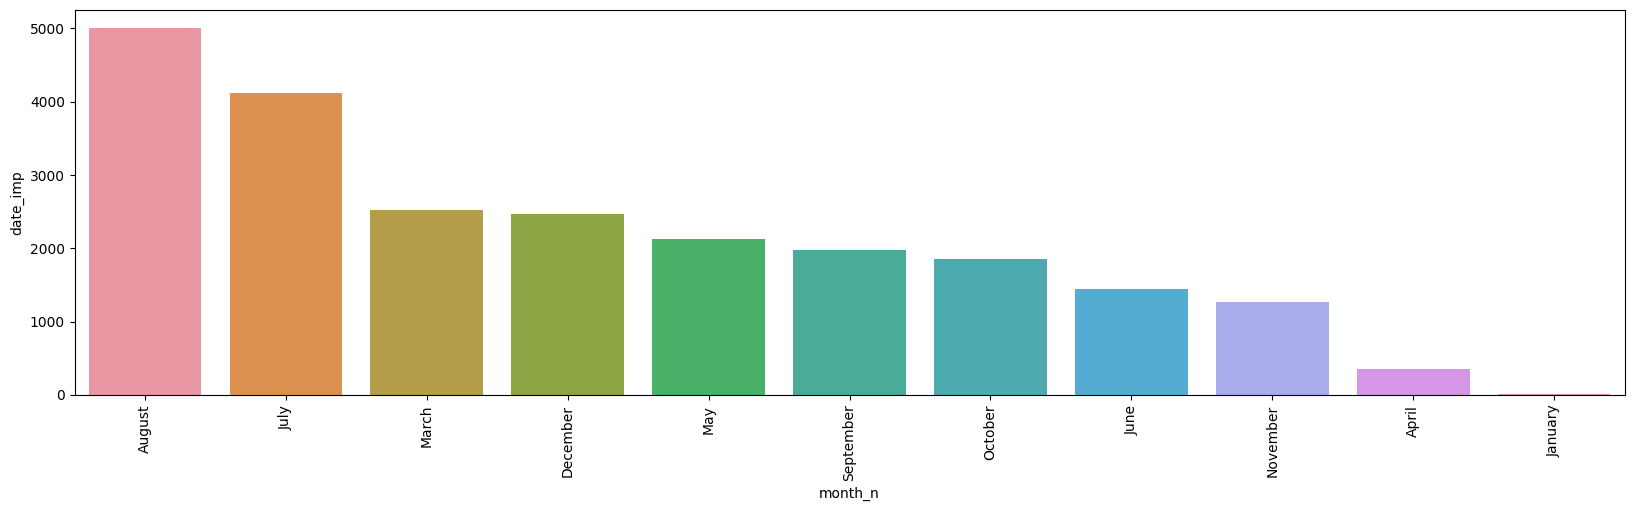

In [21]:
plt.figure(figsize=(20,5))
aux1 = df2[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=10)
sns.barplot( data=aux1, x='month_n', y='date_imp' );

### 2.5.2 Por Loja

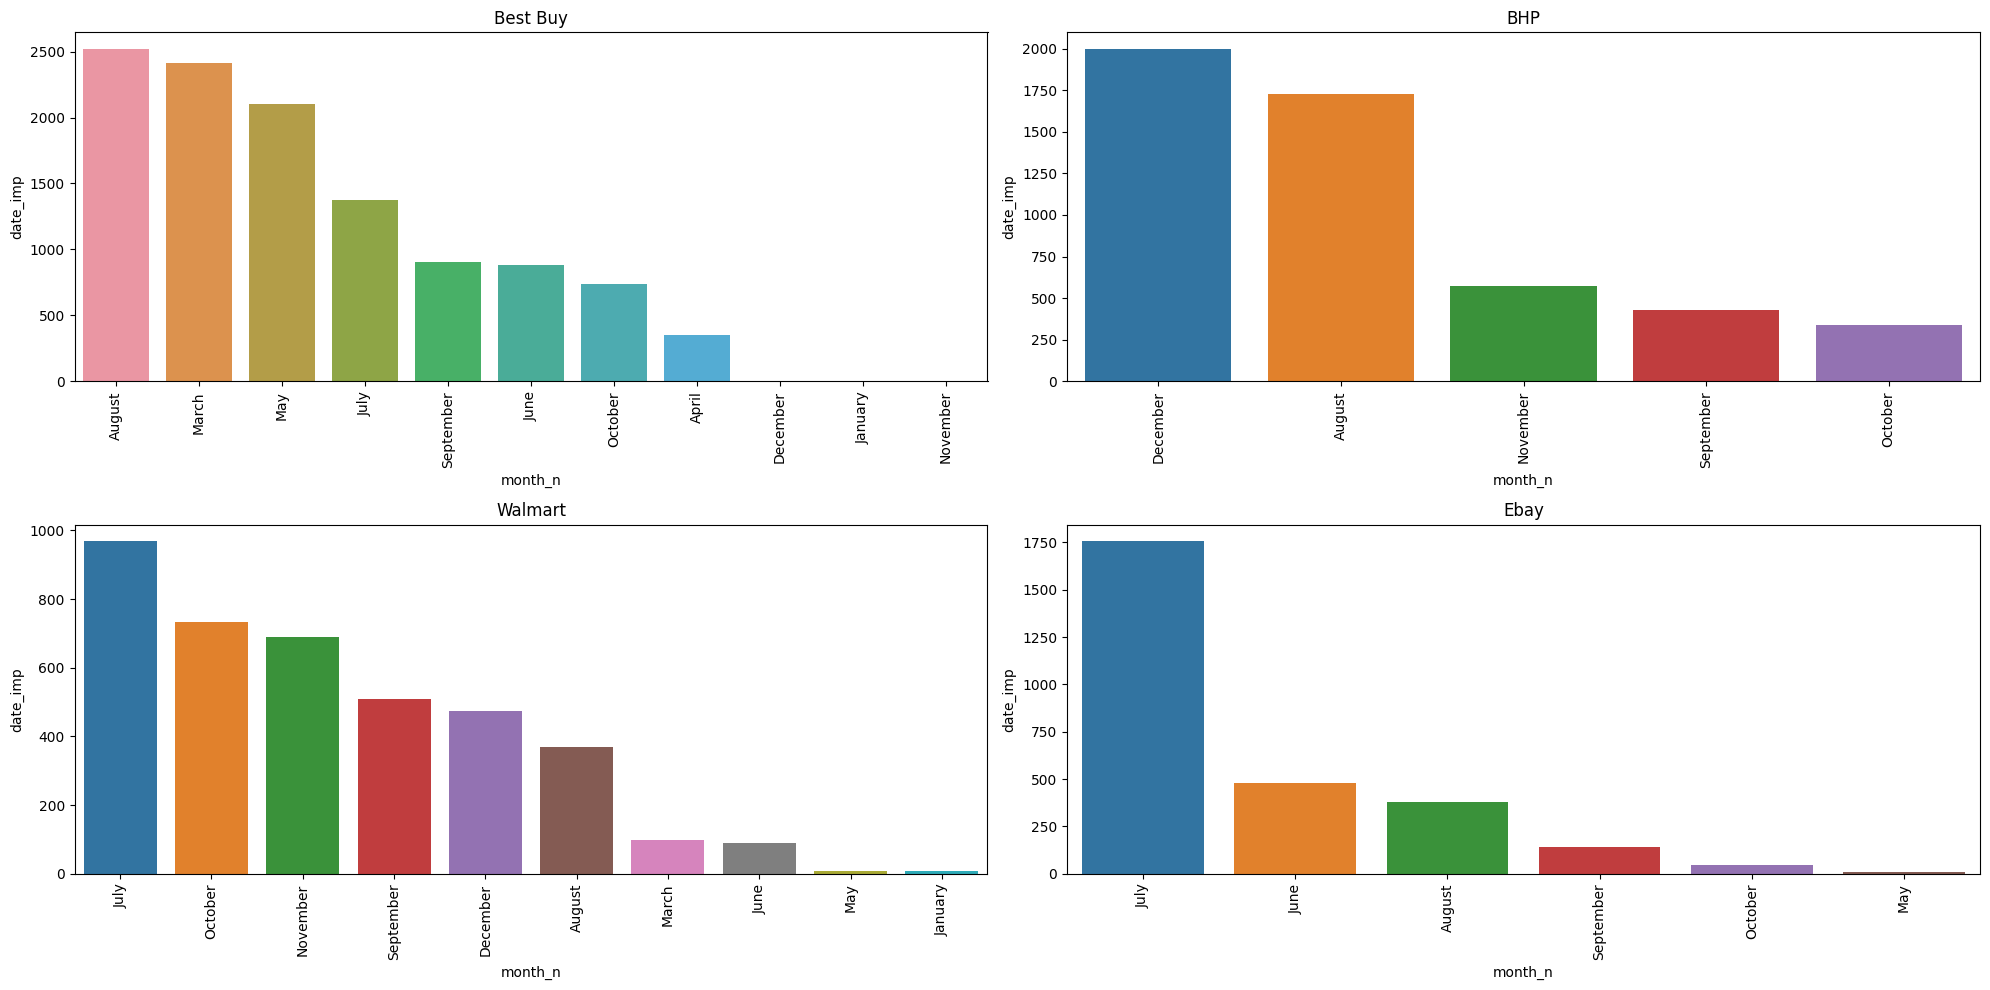

In [22]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1, x='month_n', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2, x='month_n', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3, x='month_n', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4, x='month_n', y='date_imp' );

plt.tight_layout()

## 2.6 Quais semanas mais vendem?

### 2.6.1 No Geral

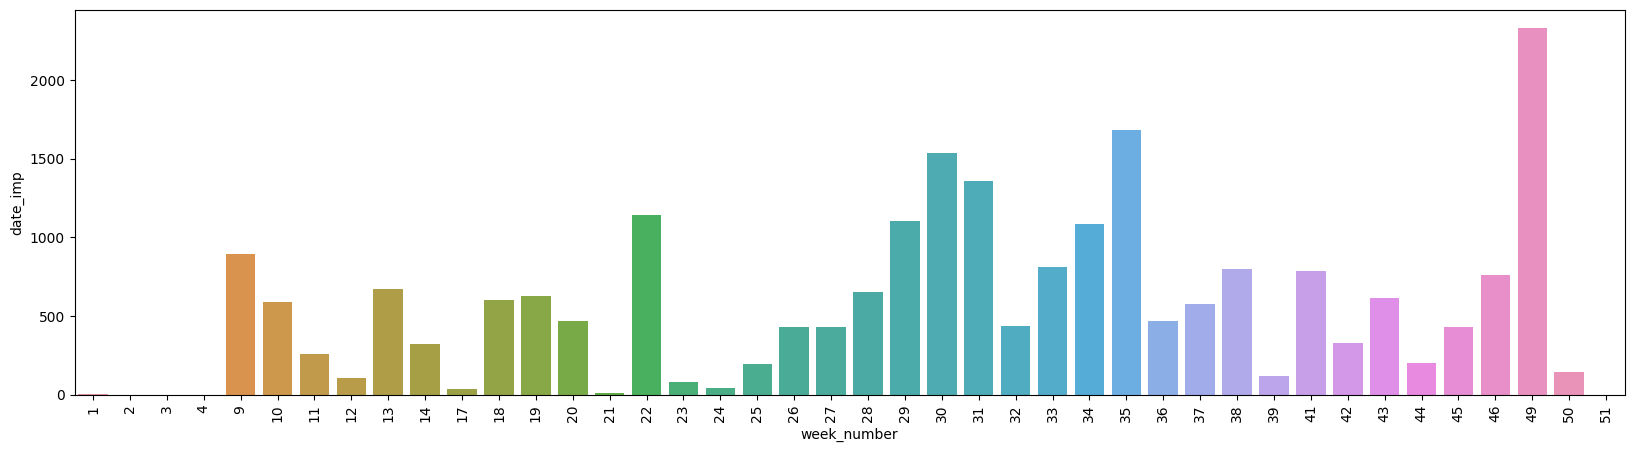

In [25]:
plt.figure(figsize=(20,5))
aux1 = df2[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=10)
sns.barplot( data=aux1, x='week_number', y='date_imp' );

### 2.6.2 Por Loja

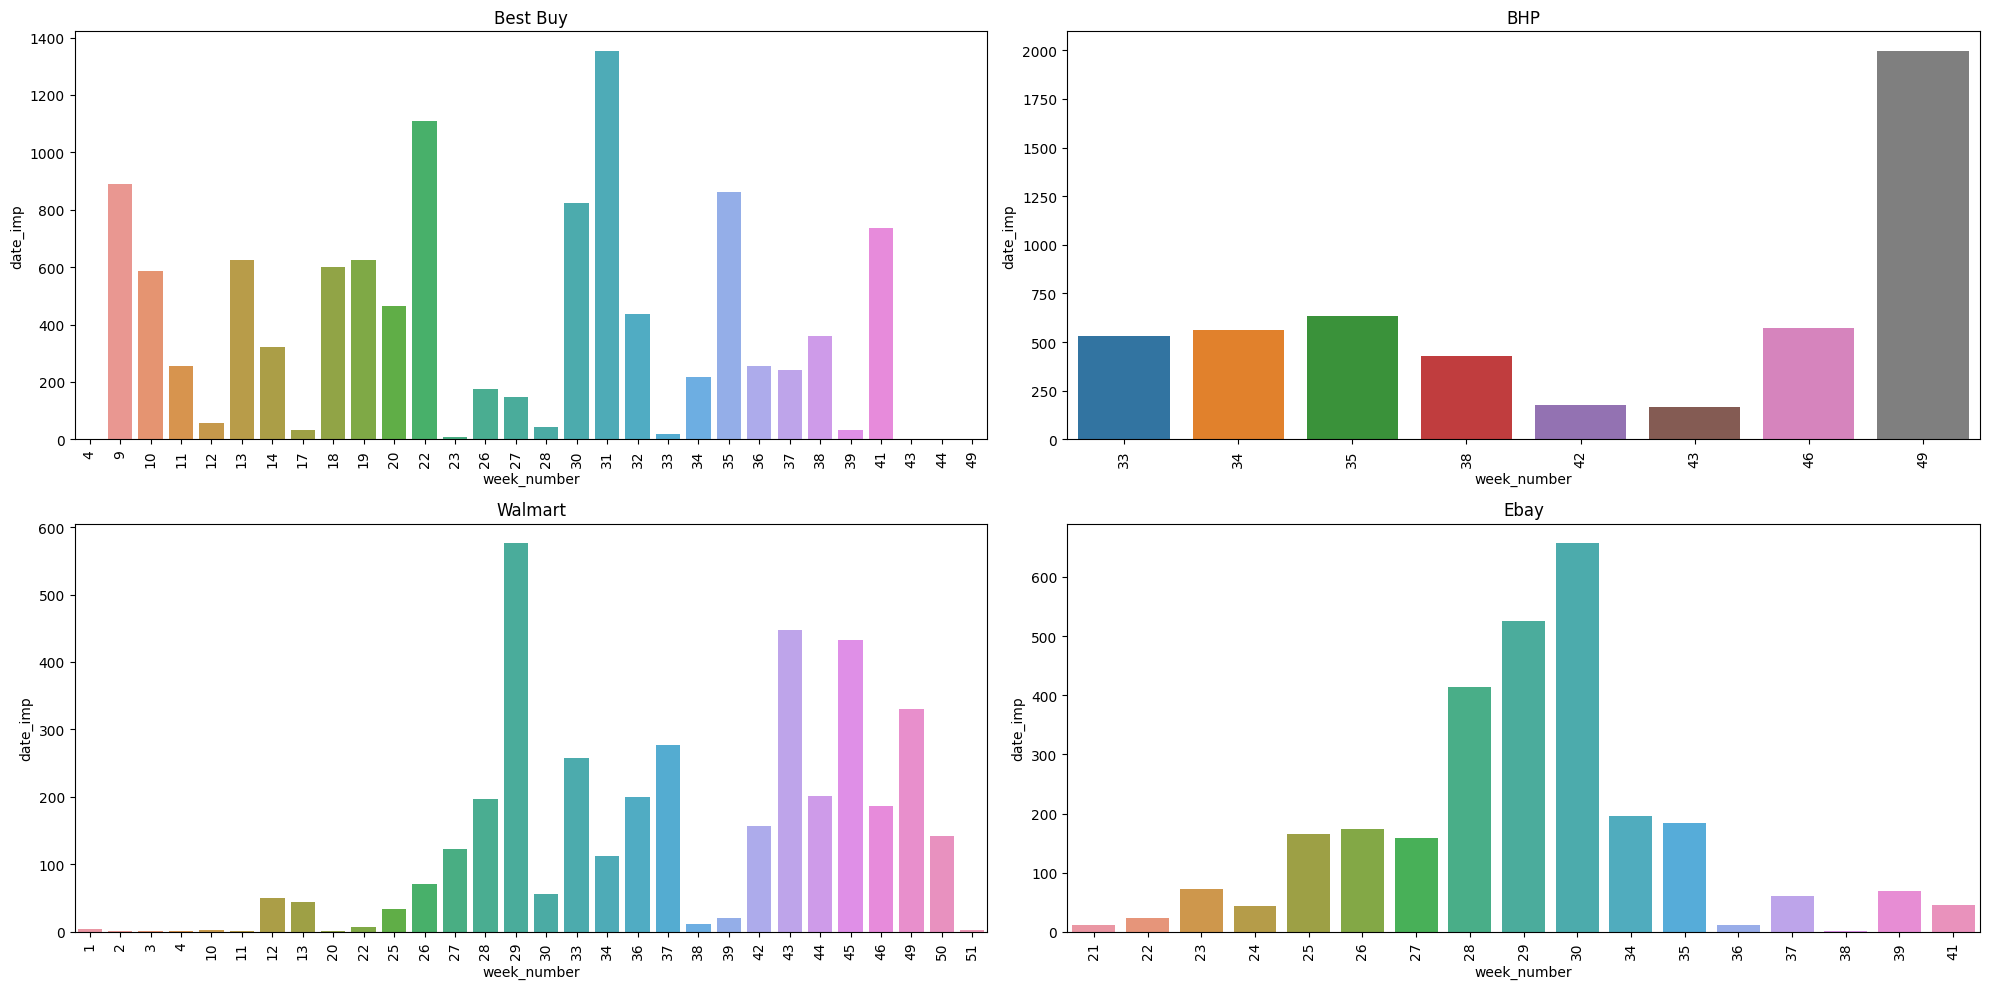

In [24]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1, x='week_number', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2, x='week_number', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3, x='week_number', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4, x='week_number', y='date_imp' );

plt.tight_layout()

# 3.0 Preparação dos Dados